# salt result viz

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import matplotlib.patches as patches
from hydroeval import evaluator, nse, rmse, pbias
import seaborn as sns
# from pyemu.pst.pst_utils import SFMT,IFMT,FFMT

In [2]:
sys.path.insert(1, 'D:/spark-brc_gits/apexmf_git')

In [3]:
from apexmf import apexmf_pst_par, apexmf_utils
from apexmf import apexmf_pst_viz
from apexmf.salt.analyzer import SaltAnalysis

# Set Path

In [258]:
ani_wd = "D:/spark-brc_gits/apexmf_git/models/main_ies_1_pp_rw_ies"
price_wd = "D:/Projects/Watersheds/Price/AMRSs/4 APEX-MODFLOW-Salt Final"
white_wd = "D:/Projects/Watersheds/White/Analysis/AMRSs/APEX-MODFLOW-Salt_wr"
ug_wd = "D:/Projects/Watersheds/Green/Analysis/AMRSs/salt_cal_230117/gr_012721/APEX-MODFLOW_no_fracs"
dol_wd = "D:/Projects/Watersheds/Dolores/Analysis/AMRSs/apexmod_230124/dr_121120/dolores_amrs"
gu_wd = "D:/Projects/Watersheds/Gunnison/Analysis/AMRSs/Gunnison_APEX-MODFLOW-Salt/APEX-MODFLOW-Salt"

tot_wds = [ani_wd, price_wd, white_wd, ug_wd, dol_wd, gu_wd]
st_dates = ["1/1/1987", "1/1/1990", "1/1/1985", "1/1/1995", "1/1/1987", "1/1/2007"]
cal_st_dates = ["1/1/1992", "1/1/1995", "1/1/1990", "1/1/2000", "1/1/1992", "1/1/2009"]
cal_ed_dates = ["12/31/2011", "12/31/2015", "12/31/2019", "12/31/2019", "12/31/2011", "12/31/2015"]
names = ['Animas', 'Price', 'White', 'Upper Green','Dolores', 'Gunnison']

# os.chdir(wd)

In [259]:
contb_df = pd.DataFrame()
for i in range(6):
    md = SaltAnalysis(tot_wds[i])
    df = md.load_salt_budget_watershed()
    df.index = pd.date_range(st_dates[i], periods=len(df))
    df = df[cal_st_dates[i]:cal_ed_dates[i]]
    adf = df.resample('A').sum().mean()
    dff = adf.loc[['runoff', 'erosion', 'lateral', 'APEXswgw', 'APEXgwsw']]
    dff.name = names[i]
    contb_df = pd.concat([contb_df, dff], axis=1)
    

In [260]:
ncontb_df = contb_df*-1
tncontb_df = ncontb_df.T

In [261]:
tncontb_df

,runoff,erosion,lateral,APEXswgw,APEXgwsw
Animas,4.591198e+06,8.434861e+05,8.344329e+06,-2.105216e+05,2.656965e+08
Price,6.159589e+05,8.848033e+05,4.586207e+06,-2.809668e+06,6.110551e+07
White,4.657151e+06,1.465065e+06,1.763028e+05,-2.461780e+06,2.559522e+06
Upper Green,3.644850e+07,4.699085e+07,9.218036e+06,-7.812410e+07,3.223220e+09
Dolores,-0.000000e+00,-0.000000e+00,4.099698e+06,-8.246462e+04,1.588109e+08
Gunnison,4.289092e+07,2.587020e+07,9.968415e+07,-7.520301e+03,1.001897e+09


In [262]:
tncontb_df.loc["Upper Green", "APEXgwsw"] = 1.241623e+09

In [263]:
tncontb_df

,runoff,erosion,lateral,APEXswgw,APEXgwsw
Animas,4.591198e+06,8.434861e+05,8.344329e+06,-2.105216e+05,2.656965e+08
Price,6.159589e+05,8.848033e+05,4.586207e+06,-2.809668e+06,6.110551e+07
White,4.657151e+06,1.465065e+06,1.763028e+05,-2.461780e+06,2.559522e+06
Upper Green,3.644850e+07,4.699085e+07,9.218036e+06,-7.812410e+07,1.241623e+09
Dolores,-0.000000e+00,-0.000000e+00,4.099698e+06,-8.246462e+04,1.588109e+08
Gunnison,4.289092e+07,2.587020e+07,9.968415e+07,-7.520301e+03,1.001897e+09


<Figure size 900x900 with 0 Axes>

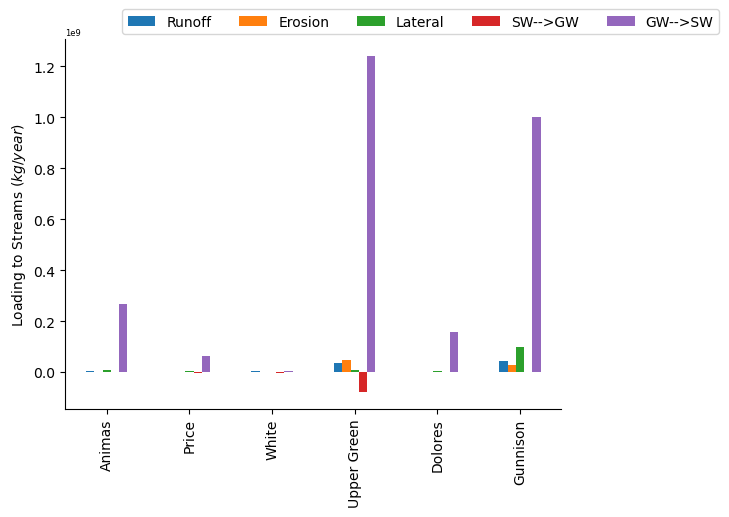

In [270]:
plt.figure(figsize=(9, 9))
ax = tncontb_df.plot(kind='bar')
ax.set_ylabel(r'Loading to Streams $(kg/year)$', fontsize=10)
ax.legend(
    labels=["Runoff", "Erosion", "Lateral", "SW-->GW", "GW-->SW"], loc ="upper left", fontsize=10,
    ncols=5,
    bbox_to_anchor=(0.1, 1.1)
    )
ax.tick_params(axis='both', labelsize=10)
ax.spines[['right', 'top']].set_visible(False)
plt.savefig(os.path.join('D:/spark-brc_gits/apexmf_git','{}.jpg'.format("salt_loadings")), dpi=300, bbox_inches="tight")
plt.show()


In [271]:
os.getcwd()

'D:\\Projects\\Watersheds\\Gunnison\\Analysis\\AMRSs\\Gunnison_APEX-MODFLOW-Salt\\APEX-MODFLOW-Salt'

In [272]:
ncontb_df

,Animas,Price,White,Upper Green,Dolores,Gunnison
runoff,4.591198e+06,6.159589e+05,4.657151e+06,3.644850e+07,-0.000000e+00,4.289092e+07
erosion,8.434861e+05,8.848033e+05,1.465065e+06,4.699085e+07,-0.000000e+00,2.587020e+07
lateral,8.344329e+06,4.586207e+06,1.763028e+05,9.218036e+06,4.099698e+06,9.968415e+07
APEXswgw,-2.105216e+05,-2.809668e+06,-2.461780e+06,-7.812410e+07,-8.246462e+04,-7.520301e+03
APEXgwsw,2.656965e+08,6.110551e+07,2.559522e+06,3.223220e+09,1.588109e+08,1.001897e+09


In [273]:
ncontb_df.loc["Net GW"] = ncontb_df.loc["APEXswgw"] + ncontb_df.loc["APEXgwsw"]

In [274]:
per_df = ncontb_df.sum(axis=1)
per_df.name = "mass"
per_dff = per_df.to_frame()
per_dff.drop(["APEXswgw", "APEXgwsw"], inplace=True)


<Figure size 900x900 with 0 Axes>

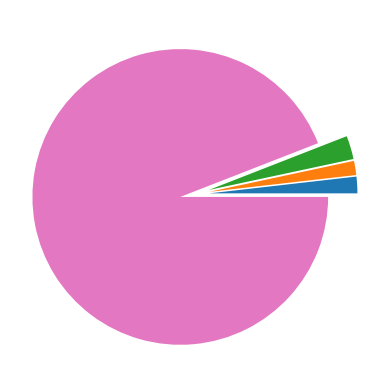

In [281]:
plt.figure(figsize=(9, 9))
ax = per_dff.plot(
    kind="pie", y="mass",explode=(0.1, 0.1, 0.1,0.1),
    colors = ['C0', 'C1', 'C2', 'C6'], labels=None, 
#     autopct='%1.2f%%',
    legend=False)
ax.set_ylabel('')
plt.savefig(os.path.join('D:/spark-brc_gits/apexmf_git','{}.jpg'.format("salt_contb")), dpi=300, bbox_inches="tight")
plt.show()

# subscale budget

In [355]:
i = 5

In [356]:
md = SaltAnalysis(tot_wds[i])
df = md.load_salt_budget_sub()

In [357]:
df2 = pd.concat([df.iloc[:, :2], df.iloc[:,2:].div(df["area(ha)"], axis=0)], axis=1)

In [358]:
dff = pd.DataFrame()
for sub in range(1, int(df2.index.max())+1):
    sdf = df2.loc[sub]
    sdf.index = pd.date_range(st_dates[i], periods=len(sdf))
    sdf = sdf[cal_st_dates[i]:cal_ed_dates[i]]
    adf = sdf.resample('A').sum().mean()
    dff = pd.concat([dff, adf.to_frame().T], axis=0)
dff.loc[:, "salt_loads"] = (
    dff.loc[:, "runoff"] + dff.loc[:, "erosion"] + 
    dff.loc[:, "lateral"] + dff.loc[:, "gw-->sw"] -
    dff.loc[:, "sw-->gw"]
    )
dff.insert(0, 'Subbasin', [i for i in range(1, int(df.index.max())+1)])

In [359]:
gis_wd = 'D:/Projects/BLM/reports/report_230721/apexmods/blm_report_gis'

In [360]:
dff.loc[:, ['Subbasin', 'salt_loads']].to_csv(os.path.join(gis_wd, 'gu_annual02.csv'), index=False)